<a href="https://colab.research.google.com/github/mitrasurabhi/NLP-PROJECTS/blob/main/GloVe_quora_questions_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download("popular")
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from wordcloud import WordCloud
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense,Bidirectional,GlobalMaxPool1D, Input, GRU
from tensorflow.keras.models import Model,Sequential
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import gensim

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
dataset = pd.read_csv('https://cdn.extras.talentsprint.com/ADSMI/Datasets/quora_question_pairs.zip')
dataset.drop(['id','qid1','qid2'],axis=1,inplace=True)
dataset.dropna(inplace= True)
dataset.tail()

,question1,question2,is_duplicate
404285,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,What is one coin?,What's this coin?,0
404288,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0
404289,What is like to have sex with cousin?,What is it like to have sex with your cousin?,0


In [ ]:
CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

In [ ]:
def cleaning_text(text):
    text = str(text).lower()
#text = re.sub(r'\b(\w+)[^\w\s]*\b', r'\1', text)
 #remove punctuations
    reg = re.compile('([^0-9A-Za-z t])|(\w+://\S+)|([.\/@#*<>?])')
    text=re.sub(reg,' ',text)
    # expanding the words in using contraction map
    new_text=''
    for word in text.split():
        if word in CONTRACTION_MAP.keys():
            new_text=new_text+CONTRACTION_MAP[word]
        else:
            new_text=new_text+word
        new_text=new_text+' '
    text=new_text
    #remove stop words
    stop_words=set(stopwords.words('english'))
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

    return text

In [ ]:
quora = dataset.copy()
quora['clean_ques1']=dataset.question1.apply(cleaning_text)
quora['clean_ques2']=dataset.question2.apply(cleaning_text)

In [ ]:
quora.at[404289,'is_duplicate']=1

In [ ]:
quora.tail()

,question1,question2,is_duplicate,clean_ques1,clean_ques2
404285,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,many keywords racket programming language late...,many keywords perl programming language latest...
404286,Do you believe there is life after death?,Is it true that there is life after death?,1,believe life death,true life death
404287,What is one coin?,What's this coin?,0,one coin,coin
404288,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,approx annual cost living studying uic chicago...,little hairfall problem want use hair styling ...
404289,What is like to have sex with cousin?,What is it like to have sex with your cousin?,1,like sex cousin,like sex cousin


In [ ]:
#@title Download Word embeddings
!wget -qq https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/glove.6B.zip
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
embedding_dim=100
embedding_index=dict()
f=open('glove.6B.100d.txt', encoding="utf8")
for line in f:
    values=line.split()
    word=values[0]
    coefs=np.asarray(values[1:],dtype='float32')
    embedding_index[word]=coefs

f.close()

print('found',len(embedding_index),'word vectors ')

found 400000 word vectors 


In [ ]:
def vectorize(sentence):

    words = sentence.split()
    words_vecs = [embedding_index[word] for word in words if word in embedding_index.keys()]
    if len(words_vecs) == 0:
        return [0,0,0]
    else:
        words_vecs = np.array(words_vecs)
        mean = np.mean(words_vecs)
        max = np.max(words_vecs)
        s_dev = np.std(words_vecs)
        matrix =[mean,max,s_dev]
        return matrix

In [ ]:
%%capture
mvec1 =[vectorize(str(sentence)) for sentence in quora['clean_ques1']]
mvec2 =[vectorize(str(sentence)) for sentence in quora['clean_ques2']]

In [ ]:
df1 = pd.DataFrame(mvec1,index = quora.index,columns= ['np_mean1','np_max1','np_sdev1'])
df1

,np_mean1,np_max1,np_sdev1
0,-0.043702,2.4665,0.567828
1,-0.002110,1.8202,0.564377
2,0.031150,2.6017,0.569557
3,0.020458,1.6224,0.538666
4,-0.019360,2.0783,0.618453
...,...,...,...
404285,0.004490,2.0707,0.567532
404286,-0.025189,1.5870,0.562393
404287,-0.017331,1.7713,0.531325
404288,-0.022962,2.4260,0.557433


In [ ]:
df2 = pd.DataFrame(mvec2,index = quora.index,columns= ['np_mean2','np_max2','np_sdev2'])
df2

,np_mean2,np_max2,np_sdev2
0,-0.057315,2.4665,0.553961
1,-0.007760,2.5870,0.570587
2,0.018011,2.6017,0.577853
3,-0.018154,1.6259,0.555288
4,-0.030599,2.0783,0.595442
...,...,...,...
404285,0.006204,2.0707,0.573619
404286,0.002010,1.5870,0.551451
404287,-0.058899,1.3092,0.508777
404288,-0.015827,2.1013,0.553834


In [ ]:
def np_vectorize(sentence):
    words = sentence.split()
    words_vecs = [embedding_index[word] for word in words if word in embedding_index.keys()]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)


In [ ]:
%%capture
vec1 = [np_vectorize(str(sentence)) for sentence in quora['clean_ques1']]
vec2 = [np_vectorize(str(sentence)) for sentence in quora['clean_ques2']]

In [ ]:
temp_df1 = pd.DataFrame(vec1,index=quora.index)
temp_df2 = pd.DataFrame(vec2,index=quora.index)
print(temp_df1.head())
print(temp_df2.head())

         0         1         2         3         4         5         6   \
0 -0.054621  0.187650  0.287985  0.458259  0.148324 -0.499731 -0.514074   
1 -0.314258 -0.320524 -0.093763 -0.295214 -0.046810 -0.287912 -0.285213   
2  0.106264  0.060068 -0.041635  0.135266  0.316404 -0.092593 -0.319142   
3 -0.153273  0.293286  0.288781  0.265873 -0.327145  0.592670 -0.224846   
4 -0.475742  0.207852  0.121813  0.021113 -0.071723 -0.249051  0.060843   

         7         8         9   ...        90        91        92        93  \
0 -0.013196 -0.082457 -0.021693  ... -0.029735  0.058291 -0.038150 -0.500454   
1  0.114074  0.386396  0.030942  ...  0.280246  0.127840  0.230418 -0.129360   
2 -0.093435  0.309680  0.110422  ... -0.026953  0.437454 -0.124532 -0.360927   
3  0.244383  0.412216  0.002810  ... -0.292770  0.468390  0.216090 -0.125196   
4  0.464459 -0.030783  0.082117  ... -0.084582 -0.417546 -0.712735  0.175816   

         94        95        96        97        98        99  
0 -0

In [ ]:
m_quora = pd.DataFrame(index=quora.index)

In [ ]:
m_quora['q1_len'] = quora['clean_ques1'].str.len()
m_quora['q2_len'] = quora['clean_ques2'].str.len()

m_quora['q1_num_words'] = quora['clean_ques1'].apply(lambda row: len(row.split(" ")))
m_quora['q2_num_words'] = quora['clean_ques2'].apply(lambda row: len(row.split(" ")))

In [ ]:
def common_words(row):
     w1 = set(map(lambda word: word.lower().strip(), row['clean_ques1'].split(" ")))
     w2 = set(map(lambda word: word.lower().strip(), row['clean_ques2'].split(" ")))
     return len(w1 & w2)

m_quora['word_common'] = quora.apply(common_words, axis=1)

In [ ]:
def total_words(row):
     w1 = set(map(lambda word: word.lower().strip(), row['clean_ques1'].split(" ")))
     w2 = set(map(lambda word: word.lower().strip(), row['clean_ques2'].split(" ")))
     return (len(w1) + len(w2))

In [ ]:
m_quora['word_total'] = quora.apply(total_words, axis=1)
m_quora['word_share'] = round(m_quora['word_common']/m_quora['word_total'],2)
#quora.drop(columns = ['clean_ques1','clean_ques2'],inplace = True)
m_quora

,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,41,35,7,6,5,11,0.45
1,31,67,5,10,4,15,0.27
2,44,36,6,5,2,11,0.18
3,21,44,3,9,0,9,0.00
4,60,29,10,5,2,15,0.13
...,...,...,...,...,...,...,...
404285,56,54,7,7,6,14,0.43
404286,18,15,3,3,2,6,0.33
404287,8,4,2,1,1,3,0.33
404288,61,77,9,13,0,22,0.00


In [ ]:
final_df = pd.concat([m_quora,df1,df2,temp_df1,temp_df2], axis=1)

In [ ]:
final_df.columns = final_df.columns.astype(str)

In [ ]:
final_df

,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,np_mean1,np_max1,np_sdev1,...,90,91,92,93,94,95,96,97,98,99
0,41,35,7,6,5,11,0.45,-0.043702,2.4665,0.567828,...,-0.077831,0.100445,0.001462,-0.466377,-0.604330,0.137490,0.235497,-0.473878,0.553563,0.519812
1,31,67,5,10,4,15,0.27,-0.002110,1.8202,0.564377,...,0.136092,-0.165857,-0.067149,-0.144812,-0.386520,-0.018478,0.016853,-0.079242,0.079765,0.081055
2,44,36,6,5,2,11,0.18,0.031150,2.6017,0.569557,...,0.019602,0.661932,0.004146,-0.116329,0.356568,-0.328432,-0.131716,-0.342754,0.643788,0.181946
3,21,44,3,9,0,9,0.00,0.020458,1.6224,0.538666,...,-0.314450,0.275241,-0.182800,0.259180,-0.783157,0.279875,-0.041316,-0.189203,0.251506,-0.180183
4,60,29,10,5,2,15,0.13,-0.019360,2.0783,0.618453,...,0.199440,-0.364979,-0.258852,-0.159825,-0.579840,-0.127363,-0.415936,-0.277493,0.575712,0.147476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,56,54,7,7,6,14,0.43,0.004490,2.0707,0.567532,...,0.112518,0.437733,-0.103181,0.236401,-0.234470,-0.190395,-0.577788,-0.440275,0.482369,0.436933
404286,18,15,3,3,2,6,0.33,-0.025189,1.5870,0.562393,...,0.264357,-0.263830,0.400643,0.505443,-0.383913,-0.291903,-0.243438,-0.693790,0.077987,-0.208007
404287,8,4,2,1,1,3,0.33,-0.017331,1.7713,0.531325,...,-0.172430,0.296900,-0.015975,-0.400560,-0.628600,-0.341350,0.005132,-0.298590,-0.000998,-0.053860
404288,61,77,9,13,0,22,0.00,-0.022962,2.4260,0.557433,...,0.032541,-0.186120,-0.103762,-0.225169,-0.120982,-0.207172,-0.509962,-0.289632,0.521763,0.321090


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

# Define the columns to be scaled
#columns_to_scale = ['q1_len', 'q2_len', 'q1_num_words', 'q2_num_words', 'word_common', 'word_total', 'word_share']
scaled_data = scaler.fit_transform(final_df)

In [ ]:
#Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_data,dataset['is_duplicate'],test_size=0.2, random_state=50)

#print(f'X train is: \n{X_train}')
print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y train shape: {y_train.shape}')
#print(f' y test is: \n{y_test}')
print(f'y test shape: {y_test.shape}')

X train shape: (323429, 213)
X test shape: (80858, 213)
y train shape: (323429,)
y test shape: (80858,)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [ ]:
def cm_disp(confusion_matrix):
  cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
  cm_display.plot()
  plt.show()

GLOVE

In [ ]:
#Train a classification model : Glove
from sklearn.linear_model import LogisticRegression

logisticModel = LogisticRegression(solver='liblinear', penalty='l1')
logisticModel.fit(X_train,y_train)
y_pred = logisticModel.predict(X_test)
y_train_pred = logisticModel.predict(X_train)

test_accuracy =  70.9

Classification report for logistic regression model 
               precision    recall  f1-score   support

           0       0.75      0.81      0.78     51038
           1       0.62      0.54      0.58     29820

    accuracy                           0.71     80858
   macro avg       0.69      0.67      0.68     80858
weighted avg       0.70      0.71      0.70     80858

Logistic regression confusion matrix
[[41176  9862]
 [13671 16149]]


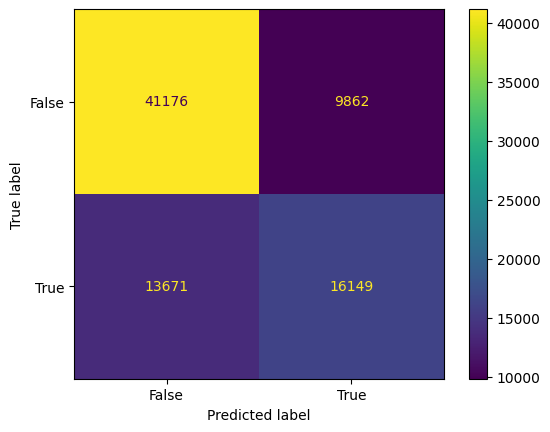

In [ ]:
print('test_accuracy = ', round((accuracy_score(y_test, y_pred)*100),2))
train_accuracy = accuracy_score(y_train, y_train_pred)

print("Training Accuracy:", train_accuracy)
print("\nClassification report for logistic regression model \n",classification_report(y_test, y_pred))

print("Logistic regression confusion matrix")
logistic_confusionMatrix = confusion_matrix(y_test, y_pred)
print(logistic_confusionMatrix)
cm_disp(logistic_confusionMatrix)



test_accuracy =  82.34

Classification report for random forest model 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87     51038
           1       0.82      0.66      0.73     29820

    accuracy                           0.82     80858
   macro avg       0.82      0.79      0.80     80858
weighted avg       0.82      0.82      0.82     80858

RandomForest confusion matrix
[[46785  4253]
 [10027 19793]]


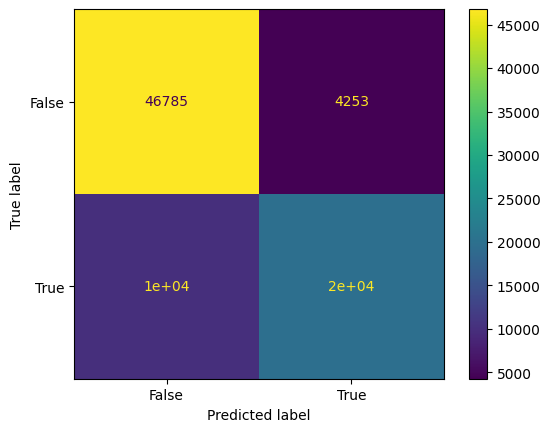

In [ ]:
#Train a RandomForestClassifier model : Glove
from sklearn.ensemble import RandomForestClassifier
randomForestModel =  RandomForestClassifier()
randomForestModel.fit(X_train,y_train)
y_pred_rf = randomForestModel.predict(X_test)

print('test_accuracy = ', round((accuracy_score(y_test, y_pred_rf)*100),2))
print("\nClassification report for random forest model \n",classification_report(y_test, y_pred_rf))

print("RandomForest confusion matrix")
randomForestModel_confusionMatrix = confusion_matrix(y_test, y_pred_rf)
print(randomForestModel_confusionMatrix)
cm_disp(randomForestModel_confusionMatrix)

test_accuracy =  74.21
Classification report for decision tree model
               precision    recall  f1-score   support

           0       0.81      0.78      0.79     51038
           1       0.64      0.68      0.66     29820

    accuracy                           0.74     80858
   macro avg       0.72      0.73      0.73     80858
weighted avg       0.75      0.74      0.74     80858

Decision tree confusion matrix
[[39755 11283]
 [ 9574 20246]]


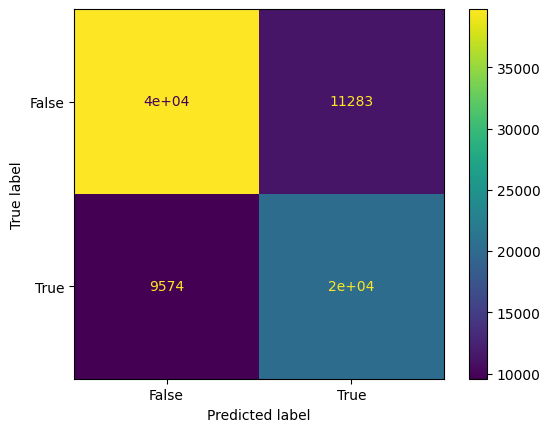

In [ ]:
##Train a DecisionTreeClassifier model : Glove
from sklearn.tree import DecisionTreeClassifier
decisionTreeModel = DecisionTreeClassifier(max_depth=20,criterion='gini')
decisionTreeModel.fit(X_train, y_train)
y_pred_dt = decisionTreeModel.predict(X_test)

print( 'test_accuracy = ', round((accuracy_score(y_test, y_pred_dt)*100),2))
print("Classification report for decision tree model\n",classification_report(y_test, y_pred_dt))

print("Decision tree confusion matrix")
decisionTreeModel_confusionMatrix = confusion_matrix(y_test,y_pred_dt )
print(decisionTreeModel_confusionMatrix)
cm_disp(decisionTreeModel_confusionMatrix)

test_accuracy =  71.27
Classification report for AdaBoostClassifier 
               precision    recall  f1-score   support

           0       0.81      0.78      0.79     51038
           1       0.64      0.68      0.66     29820

    accuracy                           0.74     80858
   macro avg       0.72      0.73      0.73     80858
weighted avg       0.75      0.74      0.74     80858

AdaBoostClassifier tree confusion matrix
[[39755 11283]
 [ 9574 20246]]


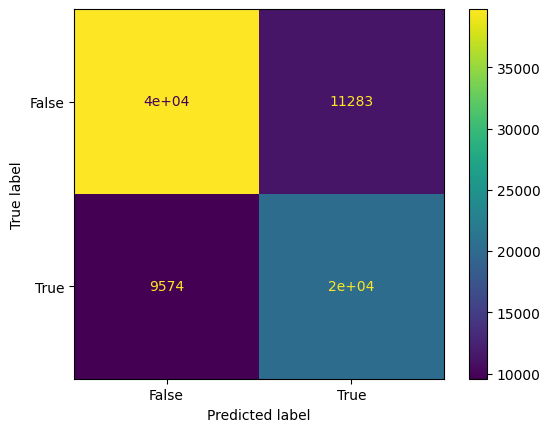

In [ ]:
##Train a AdaBoostClassifier model : Glove
from sklearn.ensemble import AdaBoostClassifier

#Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=6)
clf = AdaBoostClassifier(n_estimators=50, base_estimator=DTC ,learning_rate=0.01)
AB=clf.fit(X_train,y_train)
y_pred_clf=AB.predict(X_test)

print( 'test_accuracy = ', round((accuracy_score(y_test, y_pred_clf)*100),2))
print("Classification report for AdaBoostClassifier \n",classification_report(y_test, y_pred_dt))

np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

print("AdaBoostClassifier tree confusion matrix")
confusionMatrix_clf = confusion_matrix(y_test,y_pred_dt )
print(confusionMatrix_clf)
cm_disp(confusionMatrix_clf)